In [25]:
# Importing all necessary libraries
# This project takes images taken from boxes at the warehouse and predicts whether 
# images from the warehouse or the internet are Ninestar or Aster

import math

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 320, 320

import os
dir = os.listdir('/v_data/train')
print(dir)

#file_path = ('/v_data/train/.ipynb_checkpoints')
#os.rmdir(file_path)
#file_path = ('/v_data/test/.ipynb_checkpoints')
#os.rmdir(file_path)

#dir = os.listdir('/v_data/train')
#print(dir)

['aster', 'ninestar']


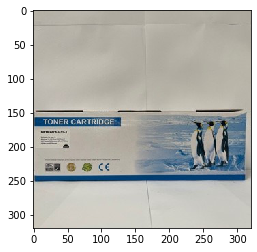

ninestar_1


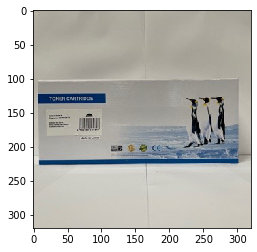

ninestar_2


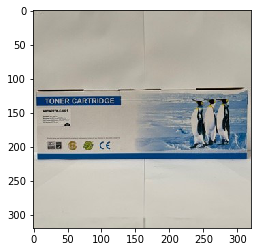

ninestar_3


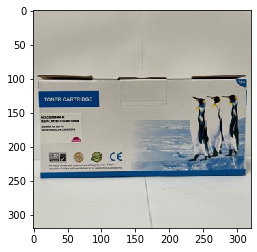

ninestar_4


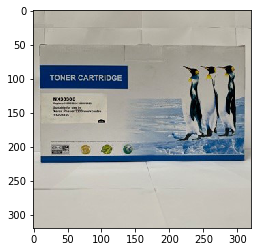

ninestar_5


In [12]:
for i in range(1,6):
  image = load_img('/v_data/train/ninestar/'+str(i)+'.jpg', target_size=(320, 320))
  img = np.array(image)
  img = img / 255.0
  from matplotlib import pyplot as plt
  plt.imshow(img, interpolation='nearest')
  plt.show()
  img = img.reshape(1,320,320,3)
  print('ninestar_'+str(i))

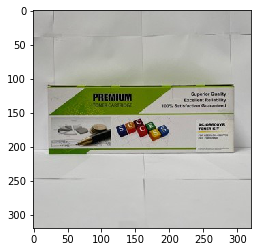

aster_1


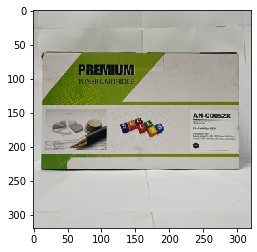

aster_2


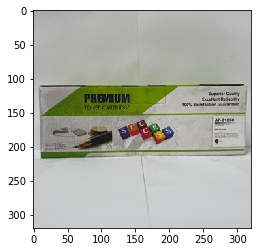

aster_3


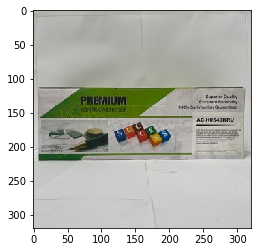

aster_4


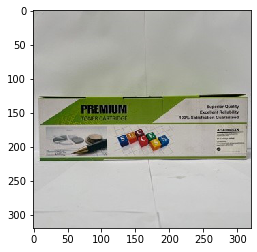

aster_5


In [14]:
for i in range(1,6):
  image = load_img('/v_data/train/aster/'+str(i)+'.jpg', target_size=(320, 320))
  img = np.array(image)
  img = img / 255.0
  from matplotlib import pyplot as plt
  plt.imshow(img, interpolation='nearest')
  plt.show()
  img = img.reshape(1,320,320,3)
  print('aster_'+str(i))

In [15]:
train_data_dir = '/v_data/train'
validation_data_dir = '/v_data/test'
nb_train_samples = 100
nb_validation_samples = 10
epochs = 10
batch_size = 10


In [16]:
if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)


In [17]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('gelu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('gelu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [18]:
model.compile(loss='binary_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])


In [19]:
train_datagen = ImageDataGenerator(
	rescale=1. / 255,
	shear_range=0.2,
	zoom_range=0.2,
	horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
	train_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
	validation_data_dir,
	target_size=(img_width, img_height),
	batch_size=batch_size,
	class_mode='binary')

model.fit_generator(
	train_generator,
	steps_per_epoch=nb_train_samples // batch_size,
	epochs=epochs,
	validation_data=validation_generator,
	validation_steps=nb_validation_samples // batch_size)


Found 100 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10
10/10 [==============================] - 3s 265ms/step - loss: 1.7543 - accuracy: 0.4800 - val_loss: 0.6953 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 242ms/step - loss: 0.6987 - accuracy: 0.4500 - val_loss: 0.6602 - val_accuracy: 0.6000
Epoch 3/10
10/10 [==============================] - 2s 238ms/step - loss: 0.6674 - accuracy: 0.5400 - val_loss: 0.6370 - val_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 2s 239ms/step - loss: 0.5983 - accuracy: 0.6900 - val_loss: 0.6734 - val_accuracy: 0.6000
Epoch 5/10
10/10 [==============================] - 2s 239ms/step - loss: 0.5496 - accuracy: 0.7000 - val_loss: 0.6533 - val_accuracy: 0.3000
Epoch 6/10
10/10 [==============================] - 2s 237ms/step - loss: 0.4687 - accuracy: 0.8300 - val_loss: 0.6954 - val_accuracy: 0.7000
Epoch 7/10
10/10 [==============================] - 3s 291ms/step - loss: 0.3515 - accuracy: 0.8900 - val_loss: 0.5558 - val_accuracy: 0.8000
Epoch 

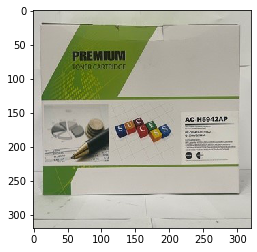

Predicted Class (0 - Aster , 1- Ninestar):  0.06395186
This is an Aster box


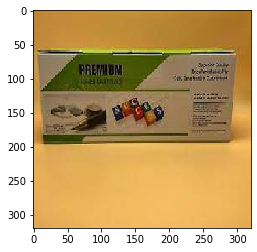

Predicted Class (0 - Aster , 1- Ninestar):  0.042782232
This is an Aster box


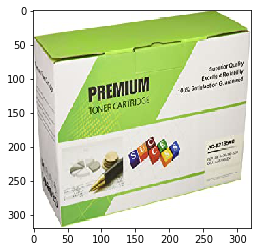

Predicted Class (0 - Aster , 1- Ninestar):  0.015264115
This is an Aster box


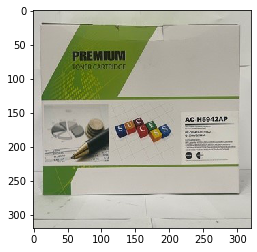

Predicted Class (0 - Aster , 1- Ninestar):  0.06395186
This is an Aster box


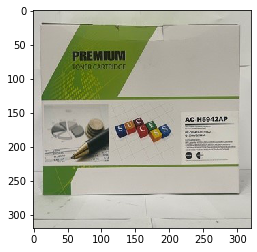

Predicted Class (0 - Aster , 1- Ninestar):  0.06395186
This is an Aster box


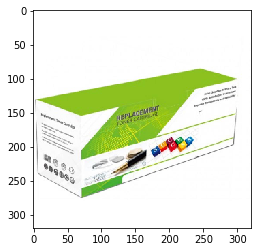

Predicted Class (0 - Aster , 1- Ninestar):  0.0019380169
This is an Aster box


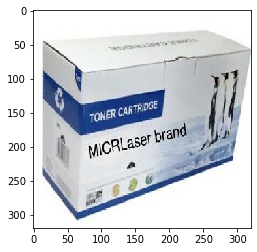

Predicted Class (0 - Aster , 1- Ninestar):  0.996813
This is a Ninestar box


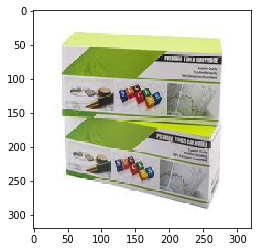

Predicted Class (0 - Aster , 1- Ninestar):  0.027948912
This is an Aster box


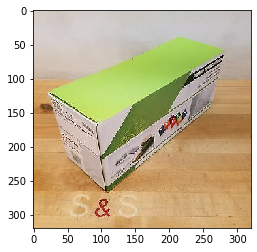

Predicted Class (0 - Aster , 1- Ninestar):  0.025372084
This is an Aster box


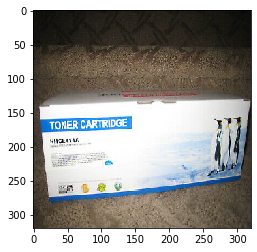

Predicted Class (0 - Aster , 1- Ninestar):  0.87475157
This is a Ninestar box


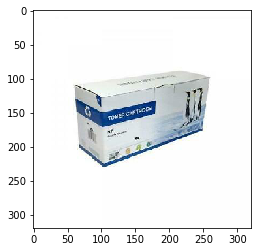

Predicted Class (0 - Aster , 1- Ninestar):  0.9868684
This is a Ninestar box


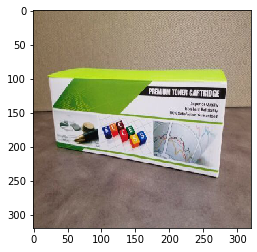

Predicted Class (0 - Aster , 1- Ninestar):  0.062031575
This is an Aster box


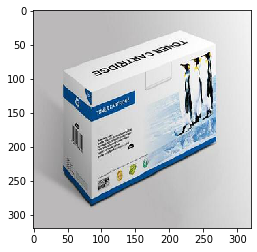

Predicted Class (0 - Aster , 1- Ninestar):  0.998201
This is a Ninestar box


In [24]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np

for i in range(1,14):
  image = load_img('/v_data/test/aster/'+str(i)+'.jpg', target_size=(320, 320))
  img = np.array(image)
  img = img / 255.0
  from matplotlib import pyplot as plt
  plt.imshow(img, interpolation='nearest')
  plt.show()
  img = img.reshape(1,320,320,3)
  label = model.predict(img)
  print("Predicted Class (0 - Aster , 1- Ninestar): ", label[0][0])

  if label[0][0] > 0.5:
   print('This is a Ninestar box')
  else:
   print('This is an Aster box')

  


#after testing, images of ninestar or aster boxes from the internet classify properly, however if i grab some random image, like a plane
#it will still try to classify ninestar or aster
#i guess since this is binary classification and the output is one of 2 choices


#id like to make batch predictions, display the images im predicting, and also identify how exactly this is deciding what is what
#also, more insight on the training process
